In [5]:
%load_ext autoreload
import ete3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
%autoreload
from src.xes.xes_file import XesFile
from src.xes.print_xes_info import PrintXesInfo
import src.utils
import src.xes.analyze_sequence

In [7]:
xes = XesFile.read("data/Activities of daily living of several individuals_1_all/data/edited_hh102_labour.xes/edited_hh102_labour.xes")
PrintXesInfo.s_print_info(xes)

Traces: 18, events: 1152
Events: Average: 64.0, Min: 46, Max: 82

4 unique attributes in events:
           Attribute  Count Presence
        concept:name   1151    99.9%
lifecycle:transition   1151    99.9%
      time:timestamp   1151    99.9%
            Column_4   1151    99.9%

"time:timestamp": 99.9% presence
average:      2011-06-27 07:57:20.849826560+00:00
min:          2011-06-14 22:06:32+00:00
max:          2011-07-09 04:55:29+00:00
average span: 1 days 00:26:16.333333333

"concept:name": 99.9% presence, 18 different values, top 5:
relax (190), personalhygiene (154), toilet (152), sleep (120), snack (84)

"lifecycle:transition": 99.9% presence, 2 different values, top 2:
start (576), complete (576)

"Column_4": 99.9% presence, 18 different values, top 5:
relax (190), personalhygiene (154), toilet (152), sleep (120), snack (84)


In [8]:
# First trace
df = xes.traces[0].df

# Filtered trace
df = df[df["lifecycle:transition"] == "complete"]

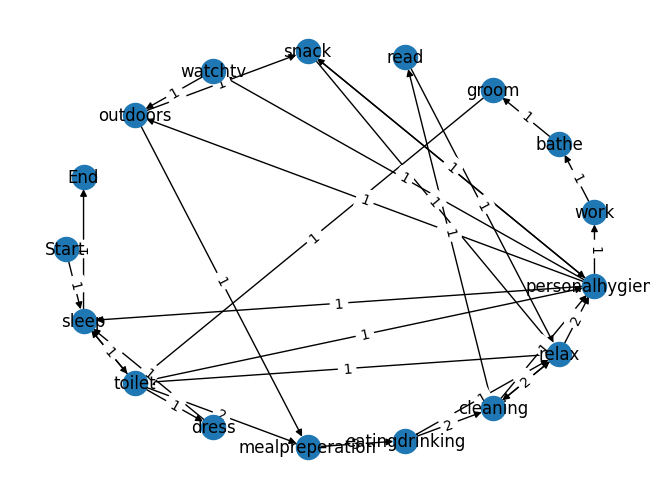

In [9]:
sequence = src.xes.analyze_sequence.analyze_sequence(
    df,
    sequence_keys=["concept:name"])
src.xes.analyze_sequence.draw_nx_graph(sequence)

In [60]:
generated = [next(iter(sequence.nodes))]
for i in range(10):
    event = generated[i]

    choice_input = {next_event_name: next_event_data["frequency"]
                    for next_event_name, next_event_data in sequence[event].items()}

    if len(choice_input) == 0: break

    next_event = src.utils.choice(choice_input)
    generated.append(next_event)
generated

['Start',
 'sleep',
 'toilet',
 'sleep',
 'toilet',
 'sleep',
 'toilet',
 'mealpreperation',
 'eatingdrinking',
 'cleaning',
 'read']

In [28]:
tree = src.xes.analyze_sequence.traverse_all_pathes(sequence, min_steps=5, max_steps=10)
print(tree.get_ascii(attributes=["name", "frequency"]))


                                                                         /sleep, 1-End, 1
                                                                        |
                                                                /toilet, 3dress, 1sleep, 1-End, 1
                                                               |        |
                                                        /sleep, 1        \personalhygiene, 1sleep, 1-End, 1
                                                       |       |
                                                       |        \-End, 1
                                                       |
                                               /toilet, 3               /toilet, 3sleep, 1-End, 1
                                              |        |-dress, 1sleep, 1
                                              |        |                \-End, 1
                                              |        |
                                              |   

In [67]:
def random_weighted_tree_path(tree: ete3.Tree):
    if len(tree.children) == 0:
        return [tree.name]

    choice_input = {node.name: node.frequency for node in tree.children}
    next_node_name = src.utils.choice(choice_input)
    next_node = next(child for child in tree.children if child.name == next_node_name)

    return [tree.name, *random_weighted_tree_path(next_node)]

random_weighted_tree_path(tree)

['Start',
 'sleep',
 'toilet',
 'dress',
 'sleep',
 'toilet',
 'dress',
 'sleep',
 'toilet',
 'dress',
 'sleep',
 'End']

In [57]:
tree.render("t.png")

{'nodes': [[16.863636363636363, 1074.5, 20.863636363636363, 1078.5, 0, None],
  [36.22727272727273, 1074.5, 40.22727272727273, 1078.5, 1, None],
  [55.59090909090909, 1074.5, 59.59090909090909, 1078.5, 2, None],
  [74.95454545454545, 230.75, 78.95454545454545, 234.75, 3, None],
  [94.31818181818181, 230.75, 98.31818181818181, 234.75, 4, None],
  [113.68181818181817, 85.25, 117.68181818181817, 89.25, 5, None],
  [133.04545454545453, 57.5, 137.04545454545453, 61.5, 6, None],
  [152.4090909090909, 29.0, 156.4090909090909, 33.0, 7, None],
  [171.77272727272728, 17.0, 175.77272727272728, 21.0, 8, None],
  [191.13636363636365, 5.0, 195.13636363636365, 9.0, 9, None],
  [210.5, 5.0, 214.5, 9.0, 10, None],
  [191.13636363636365, 17.0, 195.13636363636365, 21.0, 11, None],
  [210.50000000000003, 17.0, 214.50000000000003, 21.0, 12, None],
  [229.86363636363637, 17.0, 233.86363636363637, 21.0, 13, None],
  [191.13636363636365, 29.0, 195.13636363636365, 33.0, 14, None],
  [210.50000000000003, 29.0, 